# Исследование цен на рынке недвижимости

Мотивация исследования: Анализ и прогноз цен на недвижимость.
Исследовательский вопрос: Есть ли связь между ценой дома и факторами, представленными в нашем исследовании. 
Исследовательская гипотеза: Количество спален положительно влияет на стоимость недвижимость.

Для начала импортируем необходимые для исследования библиотеки:
numpy - библиотека для математических вычислений;
pandas - библиотека для работы с табличными данными, их агрегации и анализа;
matplotlib - библиотека для работы с графиками
seaborn - вторая библиотека для работы с графиками, часто используется в паре с matplotlib
sklearn - библиотека для построения линейной регрессии

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split # для разделения выборки для модели на обучающую и тестовую
from sklearn.linear_model import LinearRegression # модель линейной регрессии 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # метрики 

Для исследования было решено взять датасет с [kaggle](https://www.kaggle.com/datasets/shree1992/housedata/data) о информацией о цене недвижимости, а также о различных факторах, которые эту цену могут образовывать. Посмотрим на первые 5 строк:

In [155]:
df = pd.read_csv('data.csv').convert_dtypes()
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4,2.5,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


### Теперь мы можем более подробно описать наши данные:
date: дата продажи
price: цена продажи
bedrooms: количество спален
bathrooms: количество ванных комнат
sqft_living: жилая площадь в квадратных футах
sqft_lot: площадь участка в квадратных футах
floors: количество этажей
waterfront: наличие выхода к воде
view: наличие обзора
condition: состояние
sqft_above: площадь над землей в квадратных футах
sqft_basement: площадь подвала в квадратных футах
yr_built: год постройки
yr_renovated: год реновации
street: улица
city: город
statezip: почтовый индекс
country: страна

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   string 
 1   price          4600 non-null   Float64
 2   bedrooms       4600 non-null   Int64  
 3   bathrooms      4600 non-null   Float64
 4   sqft_living    4600 non-null   Int64  
 5   sqft_lot       4600 non-null   Int64  
 6   floors         4600 non-null   Float64
 7   waterfront     4600 non-null   Int64  
 8   view           4600 non-null   Int64  
 9   condition      4600 non-null   Int64  
 10  sqft_above     4600 non-null   Int64  
 11  sqft_basement  4600 non-null   Int64  
 12  yr_built       4600 non-null   Int64  
 13  yr_renovated   4600 non-null   Int64  
 14  street         4600 non-null   string 
 15  city           4600 non-null   string 
 16  statezip       4600 non-null   string 
 17  country        4600 non-null   string 
dtypes: Float

# Анализ данных


In [157]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


В колонке price есть значения, равные 0, что может быть ошибкой или означать отсутствие данных о цене. Эти строки следует исключить из анализа, так как они могут исказить результаты.
Колонка bathrooms также имеют минимальное значение 0, что может быть ошибочным. Стоит проверить и, возможно, удалить эти строки.

In [158]:
print('количество строк, где колонка \'price\' равна нулю:', len(df[df['price'] == 0]))
print('Количество строк, где колонка \'bathrooms\' равна нулю:', len(df[df['bathrooms'] == 0]))

количество строк, где колонка 'price' равна нулю: 49
Количество строк, где колонка 'bathrooms' равна нулю: 2


Таких примеров совсем немного, так что нам ничего не стоит убрать эти странные случаи. 

In [159]:
df = df[(df['price'] != 0) & (df['bathrooms'] != 0)]


### Демонстрация распределений

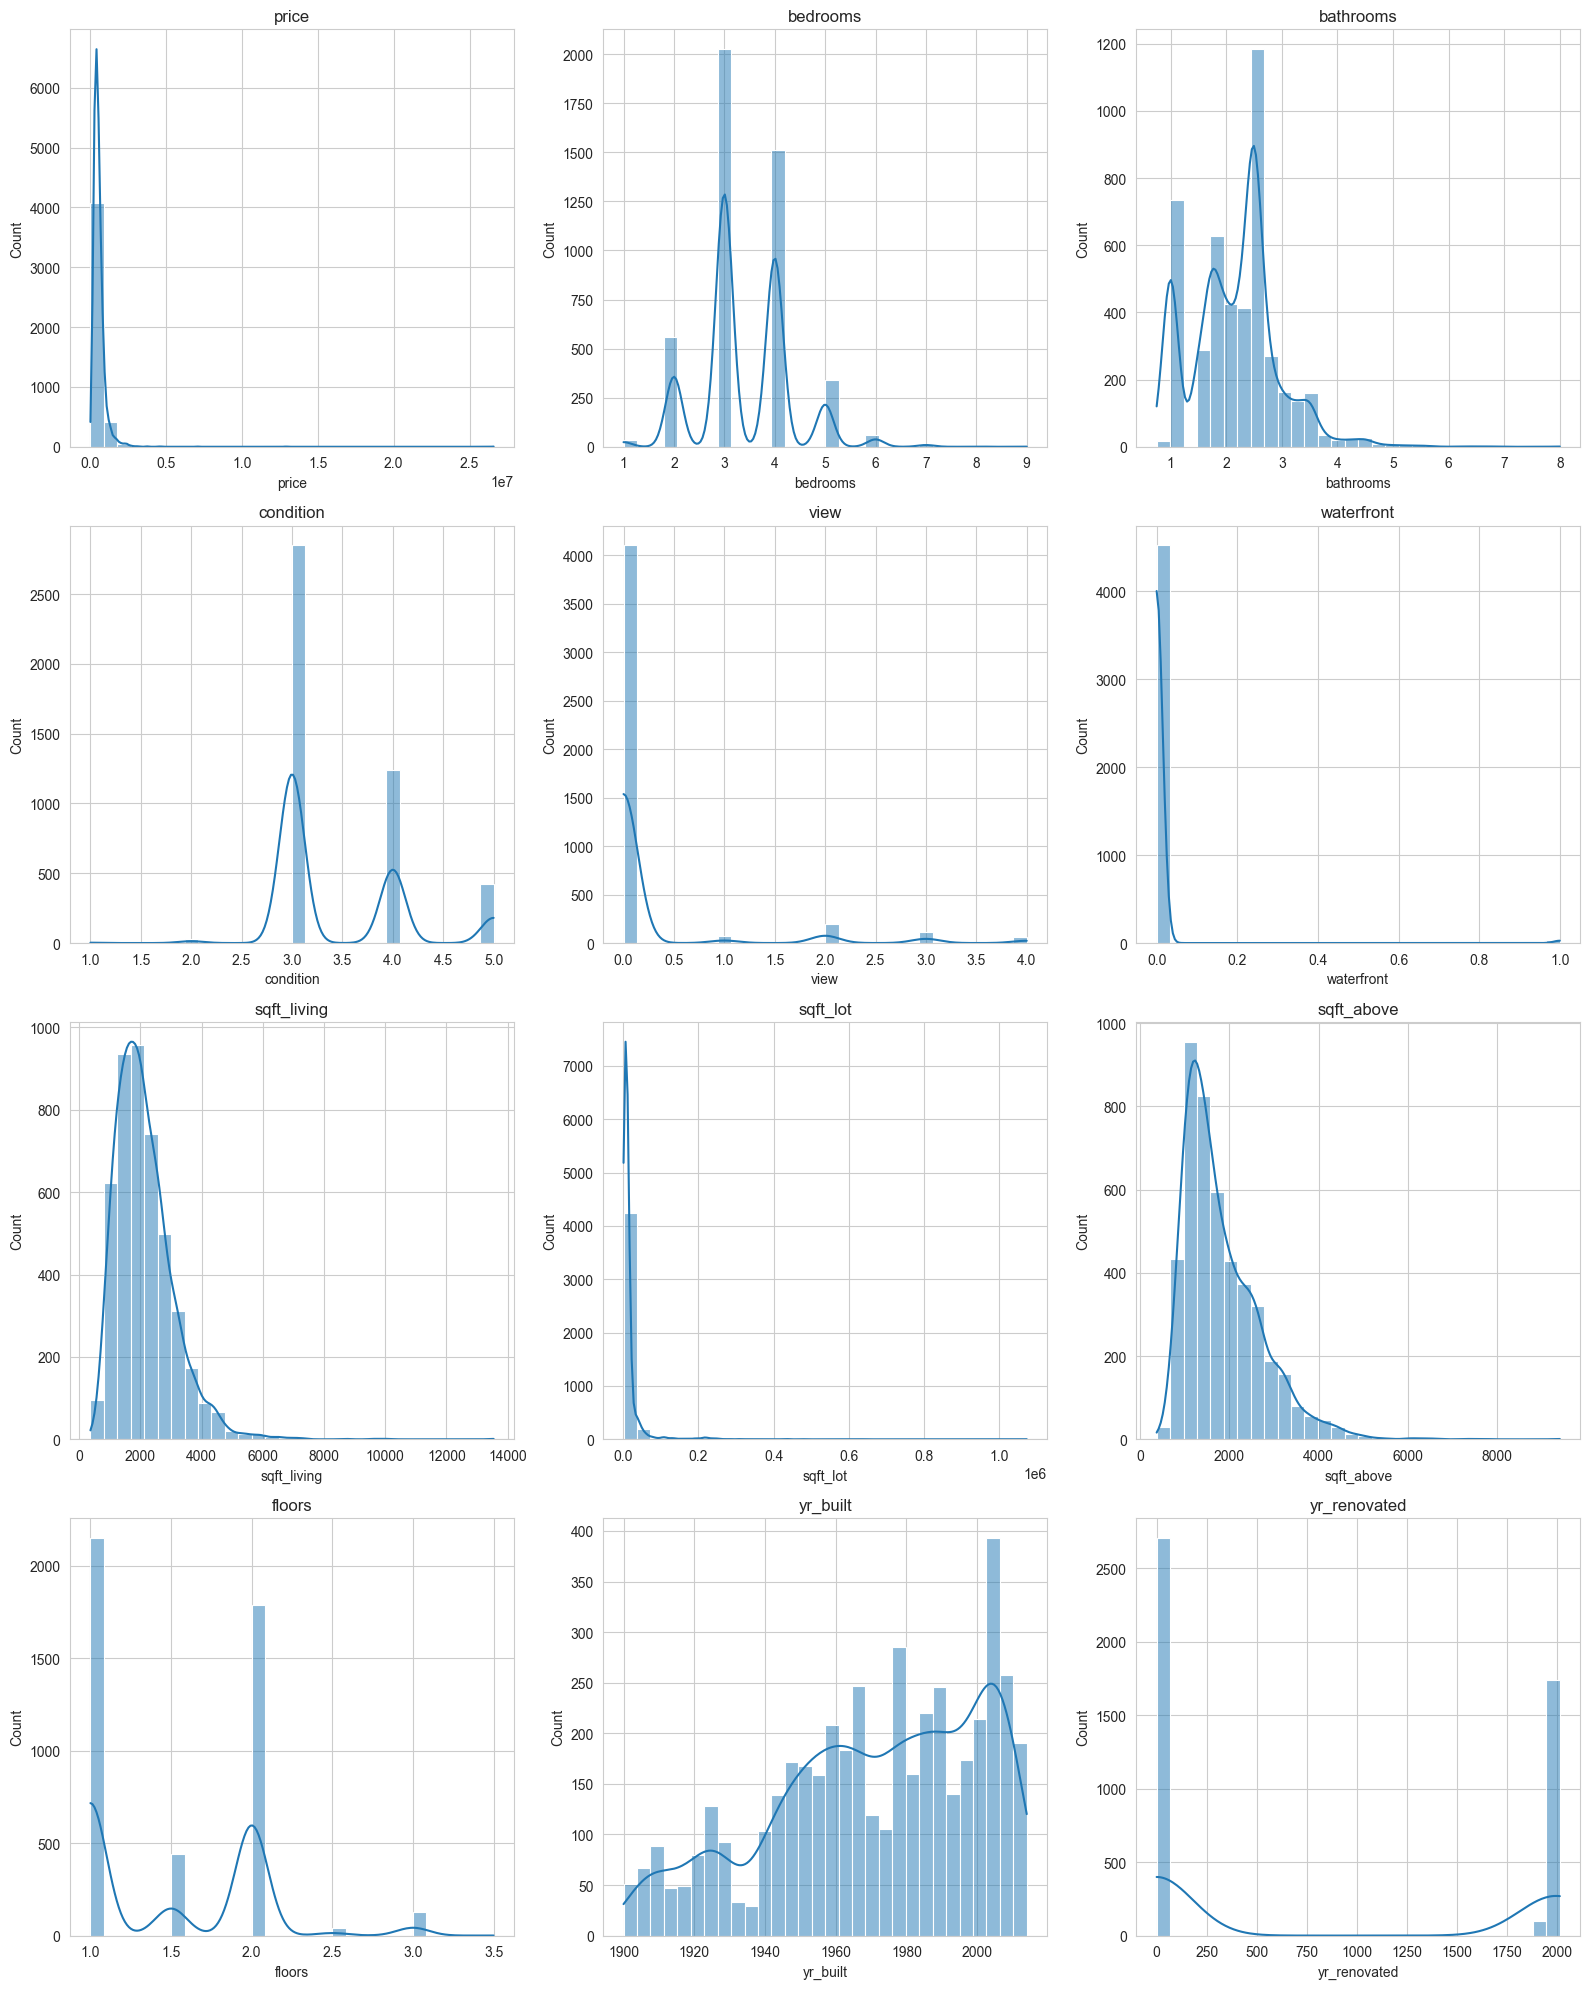

In [160]:

plt.figure(figsize=(16, 20))

# Numerical columns for distribution analysis
numerical_columns = ['price', 'bedrooms', 'bathrooms', 'condition', 'view', 'waterfront', 'sqft_living', 'sqft_lot',
                     'sqft_above', 'floors', 'yr_built', 'yr_renovated']

# Define a color palette
palette = sns.color_palette("magma", as_cmap=True)

# Plotting distributions
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True, bins=30, palette=palette)
    plt.title(column)

plt.tight_layout()
plt.show()


Если кратко пройтись по каждой гистограмме:
1. Цена почти вся собралась вокруг нуля (с учётом масштаба 1e7). Так что график является нерепрезентативным. Исправим это позже.
2. В нашей выборке у большинства объектов по 3-4 спальни, реже 2 или 5 спален, и остальные случаи являются совсем редкими. Богато живут!
3. Ванны имеют распределение, схожее с мультимодальным (целых 3 пика). Однако очень странно, что встречаются такие значения, как 1.5, 1.25, 2.75 и т.д. Можем сделать предположение, что наличие, предположим, кухонной раковины, идёт как прибавление 0.25 к данному признаку. А полноценная ванная с душем идёт как прибавление 1 к данному признаку. Это единственной разумное объяснение нецелому числу ванн.
4. Condition описывает физическое состояние недвижимости. Можем видеть, что большая часть жилья получает состояние 3, меньше получает 4, и меньше 500 домов получили оценку 5. Домов с состоянием 1 и 2 почти нет.
5. Наличие обзора view (вероятно, имеется в виду именно красивый вид) почти не встречается, но зато если встречается, то "обзоров" может быть сразу несколько! 
6. Waterfront, выхода к воде нет почти ни у кого. 
7. sqft_living - обозначает жилую площадь. Пик распределения приходится на 2000 квадратных футов.
8. sqft_lot обозначает площадь участка, не включая область дома - то есть какой-нибудь сад или газон. Почти ни у кого такого нет. Вероятно, это связано с тем, что большая часть недвижимости - квартиры.
9. sqft_above обозначает площадь, не включая область подвала. Почти полностью совпадает с жилой площадью
10. Количество этажей тоже имеет мультимодальное распределение. Пики находятся на значениях 1 и 2. Однако, что интересно, есть ещё немало недвижимости со значением поля, например, 1,5. Вероятно, таким образом можно обозначить чердак или подвал.
11. Распределение года постройки. Линия тренда показывает общий рост активности строительства с начала 1900-х до начала 2000-х годов с некоторым снижением после это. Есть пики, которые могут указывать на периоды активного строительства, например, один из самых высоких пиков приходится на период около 2000 года. Также присутствуют периоды с относительно низкой активностью строительства, например, в районе 1940 года и начале 1900-х.
12. Годы реновации. Большая часть недвижимости не имела рестоврации. И это обозначается в данных как "нулевой" год. Надо будет учесть это в будущем, и, возможно, создать колонку, отображающую наличие или отсутствие реновации. Остальные же здания претерпели реновацию в 2000-х.

### Цена
Рассмотрим более подробно нашу целевую переменную.

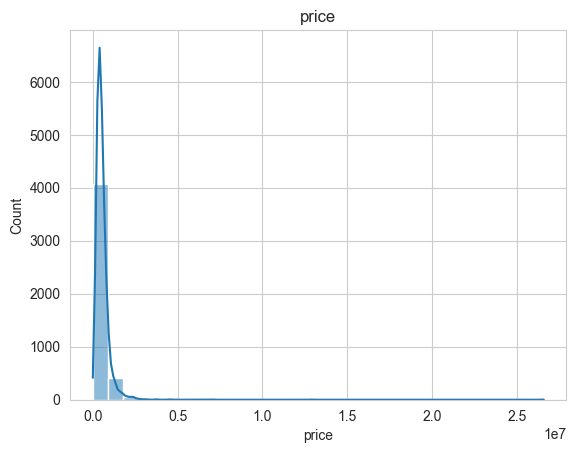

In [161]:
sns.histplot(df['price'], kde=True, bins=30, palette=palette)
plt.title('price')
plt.show()


Видно, что большая часть наблюдений сосредоточена в левой части графика, то есть при низких ценах, и количество наблюдений резко уменьшается по мере увеличения цены. Это типичный пример правосторонней асимметрии, когда большинство значений сосредоточено около низкого конца распределения, а "хвост" тянется к более высоким значениям.

Гистограмма также показывает, что в данных присутствуют выбросы, так как есть отдельные столбцы, находящиеся далеко от основной массы данных, например в области высоких значений цен.

Для анализа такого типа данных могут быть полезны логарифмическое преобразование или иные методы обработки выбросов, чтобы нормализовать распределение и лучше понять общую тенденцию. Попробуем прологарифмировать значения цены и тем самым увидеть более репрезентативную картину.

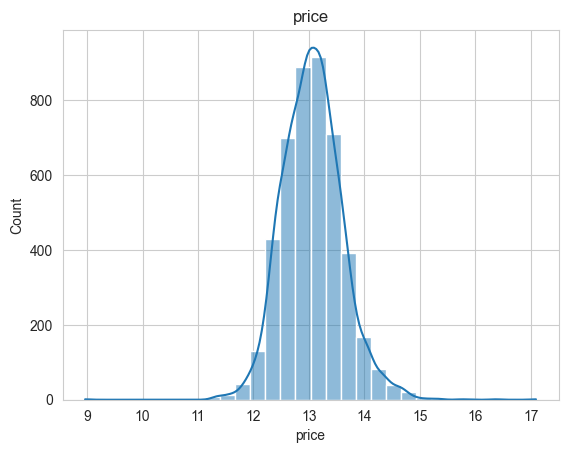

In [162]:
sns.histplot(np.log(df['price']), kde=True, bins=30, palette=palette)
plt.title('price')
plt.show()

Воистину! Логарифмирование значений цены привело гистограмму к виду, похожее на нормальное распределения. Однако не стоит делать поспешных выводов. 

Проведём тест Шапиро-Уилка.
За нулевую гипотезу примем факт того, что данные нормально распределены. 
За альтернативную гипотезу возьмём факт отсутствия нормального распределения. 

Когда p-значение теста низкое (обычно ниже установленного уровня значимости, например, 0.05), мы отвергаем нулевую гипотезу и принимаем альтернативную, что свидетельствует о ненормальности распределения данных. Если p-значение высокое, то нет оснований отвергнуть нулевую гипотезу, и мы можем предположить, что данные близки к нормальному распределению.

In [163]:
from scipy import stats

print(stats.shapiro(np.log(df['price'])))

ShapiroResult(statistic=0.9846826791763306, pvalue=8.144178276049614e-22)


p-уровень значимости стремится к нулю, что ведет к отвержению нулевой гипотезы и подтверждению альтернативной гипотезы о ненормальности распределения данных в колонке 'price'

Попробуем подойти к вопросу распределения с другой стороны - удаление данных-выбросов. 
Построим ящик с усами

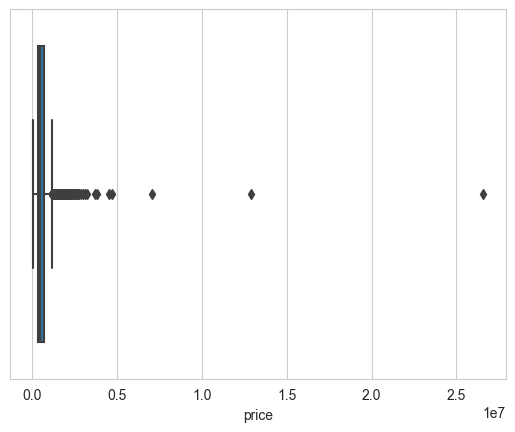

In [164]:
sns.boxplot(x=df['price'])
plt.show()

Можем видеть сильнейшие выбросы в правом хвосте распределения. Попробуем воспользоваться методов интерквартального размаха. Он определяется как разность между верхним и нижним квартилями данных.
Формула для вычисления интерквартального размаха:
IQR = Q3 - Q1
Где:
* Q1 - нижний квартиль (25-й процентиль)
* Q3 - верхний квартиль (75-й процентиль)

После этого определим нижнюю и верхнюю границы данных. По таким формулам:
lower_bound = Q1 - 1,5 * IQR
higher_bound = Q3 + 1,5 * IQR
Всё, что будет выходить за эти границы считается выбросами, и будет исключено из выборки. 

In [165]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
lower_bound = 0 if lower_bound < 0 else lower_bound
higher_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > higher_bound)]  # выбираем из датасета выбросы
percentage_outliers = (len(outliers) / len(df)) * 100

print("Нижняя граница", lower_bound)
print("Верхня граница:", higher_bound)
print("Количество выбросов:", len(outliers))
print("Какой процент от общей выборки является выбросами:", percentage_outliers)


Нижняя граница 0
Верхня граница: 1154600.0
Количество выбросов: 239
Какой процент от общей выборки является выбросами: 5.253901956473951


Теперь попробуем выкинуть выбросы и посмотреть, как меняется распределение.


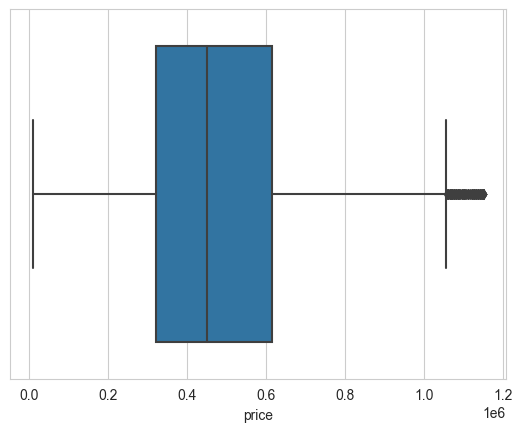

In [166]:
sns.boxplot(x=df[(df['price'] >= lower_bound) & (df['price'] <= higher_bound)]['price'])
plt.show()

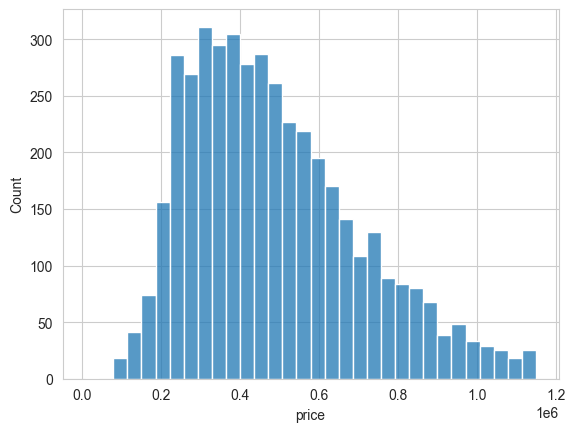

In [167]:
sns.histplot(x=df[(df['price'] >= lower_bound) & (df['price'] <= higher_bound)]['price'])
plt.show()

In [168]:
df = df[(df['price'] >= lower_bound) & (df['price'] <= higher_bound)]

In [169]:
print("Результат теста:", stats.shapiro(df['price'].astype(float)))


Результат теста: ShapiroResult(statistic=0.9563567638397217, pvalue=4.2126305844788515e-34)


p-уровень значимости всё также крайне мал, но мы хотя бы избавились от сильнейших выбросов, которые портили нам общую картину. В дальнейшем мы будем постоянно сравнивать все остальные факторы недвижимости с ценой, так как мы исследуем изначально влияние различных признаков именно на цену.

In [170]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,2014-05-02 00:00:00,342000.0,3,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4,2.5,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2,1.0,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA


## Матрица корреляций
Построим корреляционную матрицу, чтобы немного лучше понимать, какие факторы могут влиять на образование цены. 

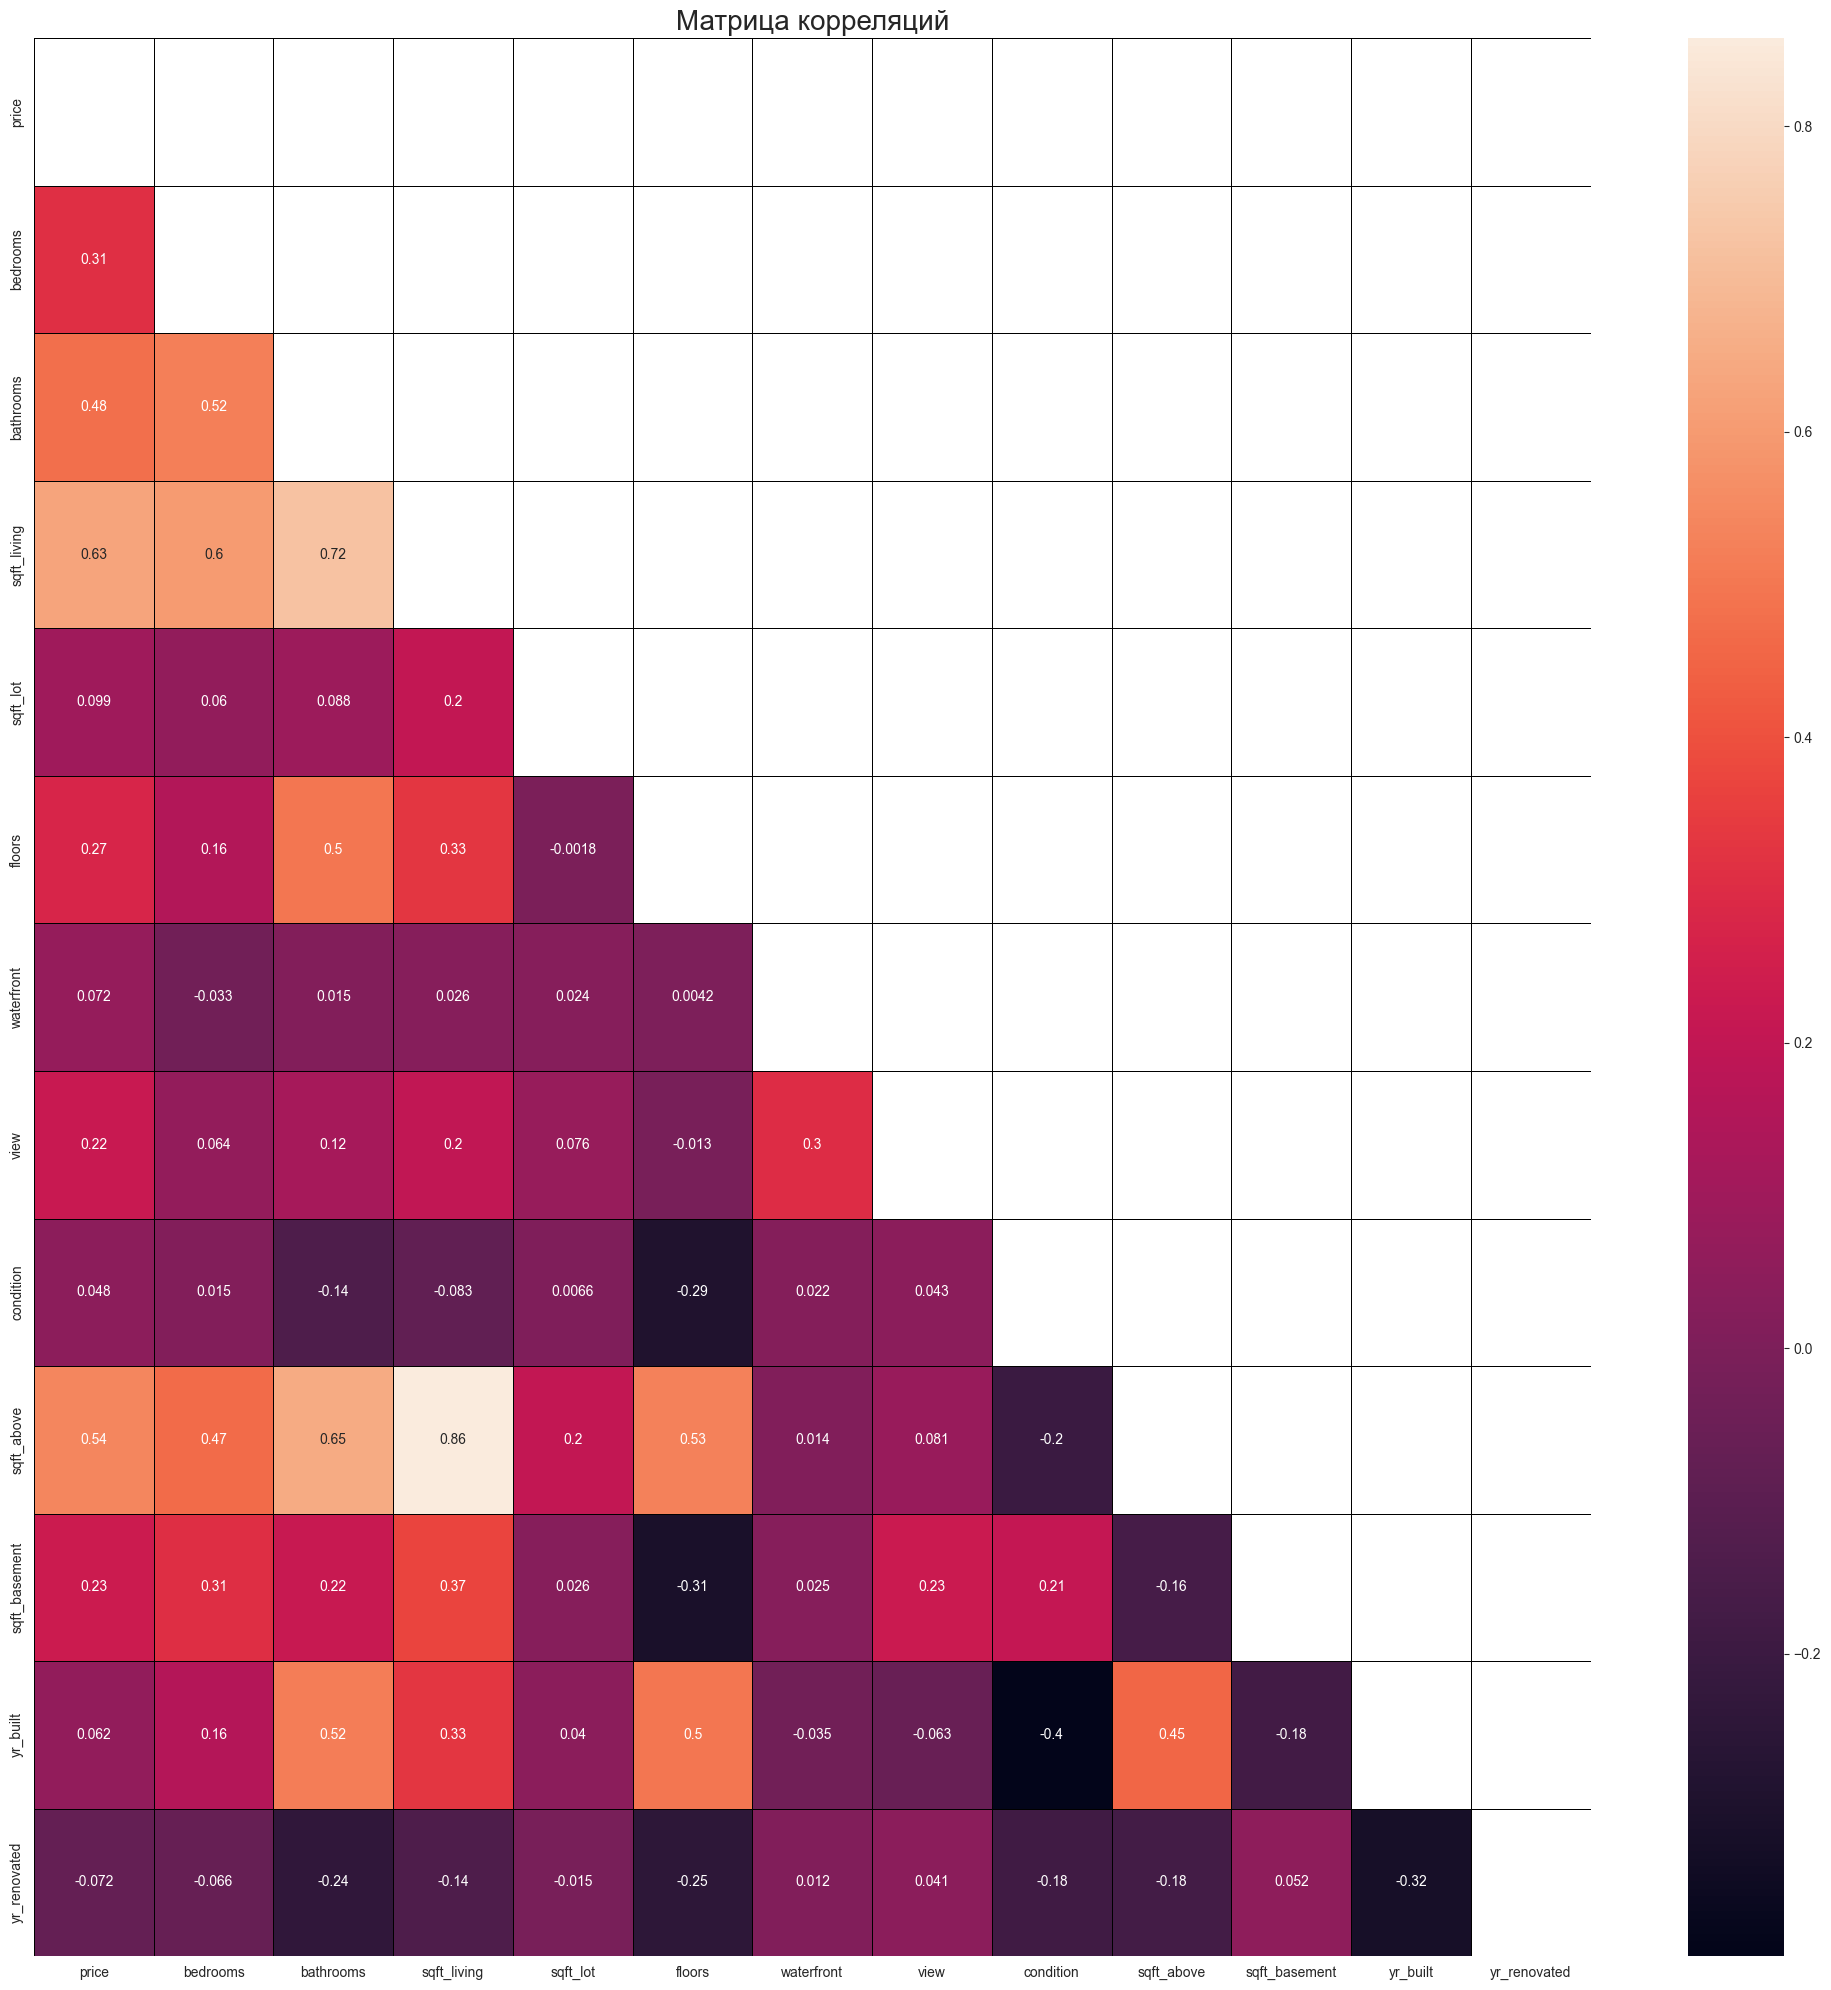

In [171]:
corr = df.drop(['date', 'street', 'city', 'country', 'statezip'], axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20, 20))
sns.heatmap(corr, mask=mask, annot=True, linewidths=0.5, linecolor='black')
plt.title('Матрица корреляций', fontsize=20)
plt.tight_layout()
plt.show()

Видим, что с ценой почти все числовые признаки (первый столбец по вертикали) довольно хорошо коррелируют. Слабее всего влияют такие признаки как год постройки, год реновации, выход к воде, площадь двора, состояние здания. Странно, что состояние здания имеет такую малую корреляцию, поэтому мы исследуем данный признак. Остальные признаки со слишком малой корреляцией рассмотрены не будут.  

### Количество спален
Количество спален является признаком, который интересует нас больше всего. Наша исследовательская гипотеза -- количество спален положительно влияет на стоимость недвижимость. Давайте вникнем в детали.

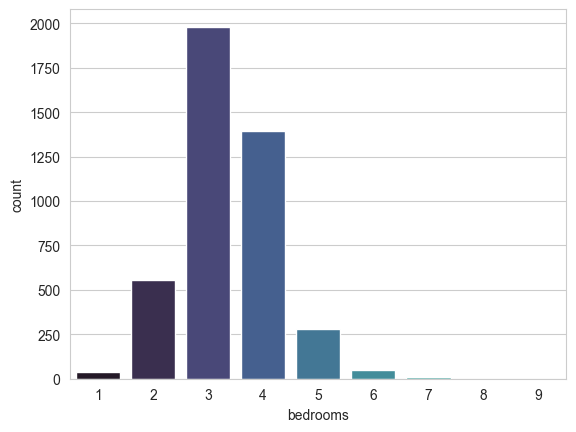

In [172]:
sns.countplot(x=df['bedrooms'], palette='mako')
plt.show()

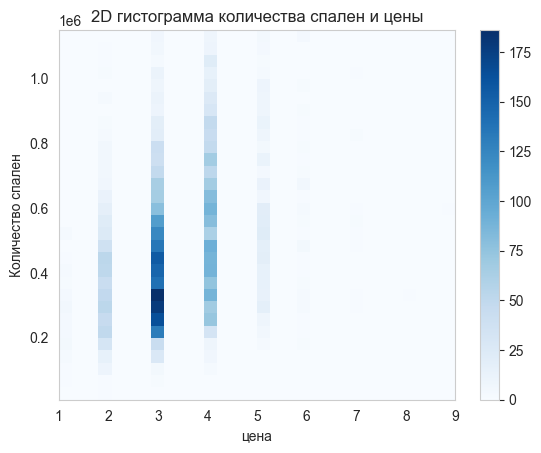

In [173]:
plt.hist2d(df['bedrooms'], df['price'], bins=[30, 30], cmap='Blues')
plt.colorbar()  # Показать шкалу цветов, которая отражает количество наблюдений в каждом бине
plt.xlabel('цена')  # Подписать ось X
plt.ylabel('Количество спален')
plt.title('2D гистограмма количества спален и цены')  # Добавить заголовок
plt.show()

Посмотрим, как отличаются выборки по цене с разными количеством спален:

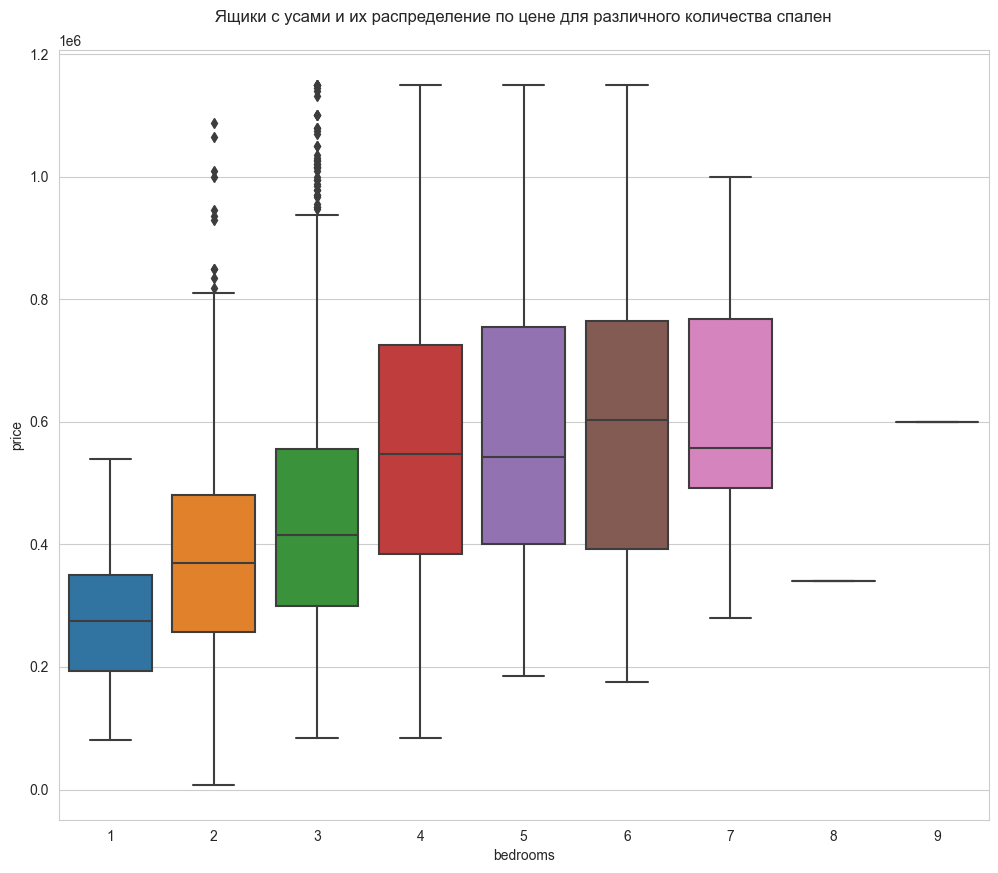

In [174]:
plt.figure(figsize=(12, 10))

sns.boxplot(data=df, x='bedrooms', y='price')
plt.title("Ящики с усами и их распределение по цене для различного количества спален", pad=20)
plt.show()

Видим значительные различия в цене и в количестве спален. Можно невооружённым взглядом видеть, что при росте спален (1-4 спальни) быстро растёт и цена. Однако для количества спален (4-7) уже значимых различий в цене не имеется. 
Для домов с 8-ю или 9-ю спальнями слишком мало данных, чтобы можно было делать какие-то выводы.
Но всё это лишь визуальное представление.


### Линейная регрессия между количеством спален и ценой
Для этого воспользуемся пакетом sklearn. В нём содержится модель линейной регрессии, функции ошибок, а также функция разделения выборки на тренировочную и тестовую.
Среднеквадратическая ошибка (MSE) — это среднее значение квадратов ошибок, то есть разности между предсказанными и фактическими значениями. Она вычисляется по формуле:

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$
MAE измеряет среднюю величину ошибок в наборе прогнозов, без учета их направления (абсолютные значения ошибок):
$$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$


Коэффициент детерминации R2 измеряет, какая доля вариативности зависимой переменной (в нашем случае цены на недвижимость) может быть объяснена с помощью независимой переменной (или переменных) в модели линейной регрессии. Другими словами, он показывает, насколько хорошо данные соотносятся с построенной линией регрессии.

Интуитивно значение R2 можно представить так: если R2=1, то модель идеально объясняет вариативность данных; если 
 R2=0, то модель не объясняет вариативность данных вообще, то есть предсказания модели не лучше, чем просто предсказание среднего значения зависимой переменной.
 
Формула R2:
$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$


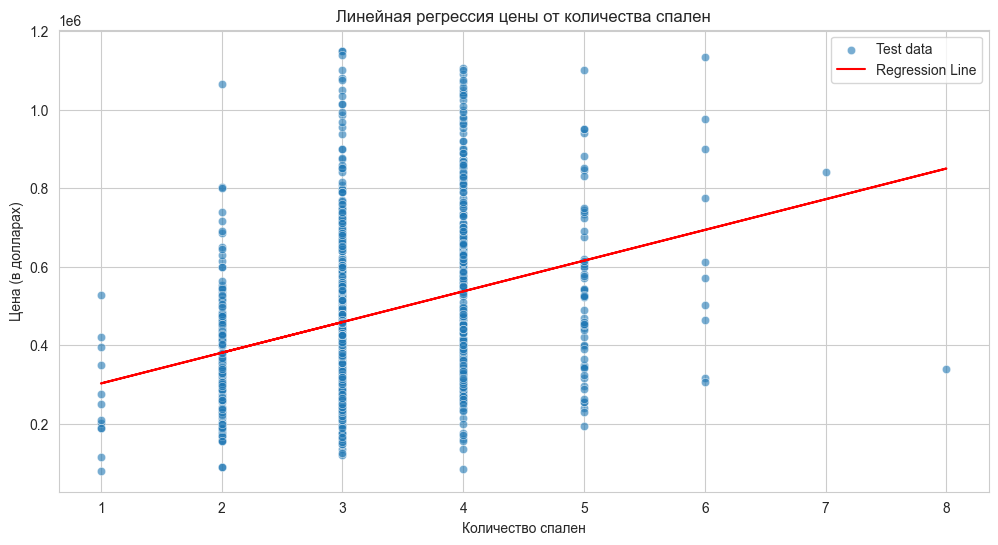

Свободный член: 224153.53057824977$
Угловой коэффициент: 78216.29416103836$ за спальню
Среднеквадартичная ошибка: 44606915575.201195
Средняя абсолютная ошибка: 168917.67396203618
Коэффициент детерминации: 0.08177874986151945


In [175]:


# Подготовка данных для модели линейной регрессии
X = df[['bedrooms']]  # Независимая переменная (признак)
y = df['price']  # Зависимая переменная (целевая переменная)

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание объекта линейной регрессии
lin_reg = LinearRegression()

# Обучение модели на тренировочных данных
lin_reg.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = lin_reg.predict(X_test)

# Расчет метрик качества модели
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Коэффициенты модели
intercept = lin_reg.intercept_  # Свободный член
slope = lin_reg.coef_[0]  # Угловой коэффициент

# Визуализация линии регрессии на графике
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_test['bedrooms'], y=y_test, alpha=0.6, label='Test data')
plt.plot(X_test['bedrooms'], y_pred, color='red', label='Regression Line')
plt.title('Линейная регрессия цены от количества спален')
plt.xlabel('Количество спален')
plt.ylabel('Цена (в долларах)')
plt.legend()
plt.show()

print(f'Свободный член: {intercept}$')
print(f'Угловой коэффициент: {slope}$ за спальню')
print(f'Среднеквадартичная ошибка: {mse}')
print(f'Средняя абсолютная ошибка: {mae}')
print(f'Коэффициент детерминации: {r2}')


Среднеквадратическая ошибка очень велика, что указывает на значительные отклонения предсказаний модели от фактических цен. То же самое относится и к средней абсолютной ошибке. Как можно видеть, простой линейной регрессией невозможно описать влияние количества спален на цену недвижимости. Ведь линейная регрессия - линия. А в нашем случае зависимость количества спален и цены линейной не назвать.

Как бы то ни было, это всё равно хождения вокруг да около. Требуется проведение статистического t-теста для того, чтобы можно было делать какие либо конечные выводы.

Сформулируем H0 и H1 гипотезы:
Нулевая гипотеза (H0) - количество спален не является статистически значимым в контексте влияния на цену.
Альтернативная гипотеза (H1) - количество спален является статистически значимым при влиянии на цену.

Проведём t-тест, но в этом случае t-тест применяется для проверки значимости коэффициента наклона, полученного из линейной регрессии. Это отличается от классического использования t-теста для сравнения средних двух групп.

Вот краткое описание того, что делает функция `t_test`:

1. **Линейная регрессия**: Сначала она использует линейную регрессию для оценки связи между $ X $ и $ y $. Это предполагает модель $ y = \beta_0 + \beta_1 X + \epsilon $, где $ \beta_1 $ — это коэффициент наклона.

2. **Стандартная ошибка коэффициента наклона**: Вычисляется стандартная ошибка коэффициента наклона. Это мера точности оценки коэффициента наклона.

3. **Расчет t-статистики**: Затем рассчитывается t-статистика для коэффициента наклона. Это делается для проверки нулевой гипотезы о том, что коэффициент наклона равен нулю (то есть нет связи между $ X $ и $ y $).

4. **Расчет p-value**: На основе t-статистики рассчитывается p-value, который помогает определить статистическую значимость коэффициента наклона.

Этот метод часто используется в статистике и машинном обучении для оценки важности и влияния предикторов в линейной регрессии. Если p-value мало, это указывает на то, что есть статистически значимая связь между $ X $ и $ y $.

Формулы:


1)**Стандартная ошибка коэффициента наклона**:
$$ \text{SE}_{\text{slope}} = \sqrt{\frac{\sum(y_i - \hat{y}_i)^2}{n - 2}} / \sqrt{\sum(X_i - \bar{X})^2} $$ где $ \hat{y}_i $ — предсказанные значения, $ y_i $ — фактические значения, $ n $ — размер выборки, $ \bar{X} $ — среднее значение $ X $.

2)**Расчет t-статистики**:
$$
t = \frac{\text{slope}}{\text{SE}_{\text{slope}}}
$$

3)**Расчет p-value**: P-уровень значимости рассчитывается на основе t-статистики и степеней свободы $ n - 2 $ как:

    $$ \text{p-value} = 2 \times (1 - \text{CDF}_{t}(\text{abs}(t), \text{df} = n - 2)) $$
   где $\text{CDF}_{t}$ — кумулятивная функция распределения для t-распределения.


Стандартная ошибка коэффициента наклона: 3544.731634959517
Значение t-статистики: 21.583181434525546
p-уровень значимости: 0.0000000000


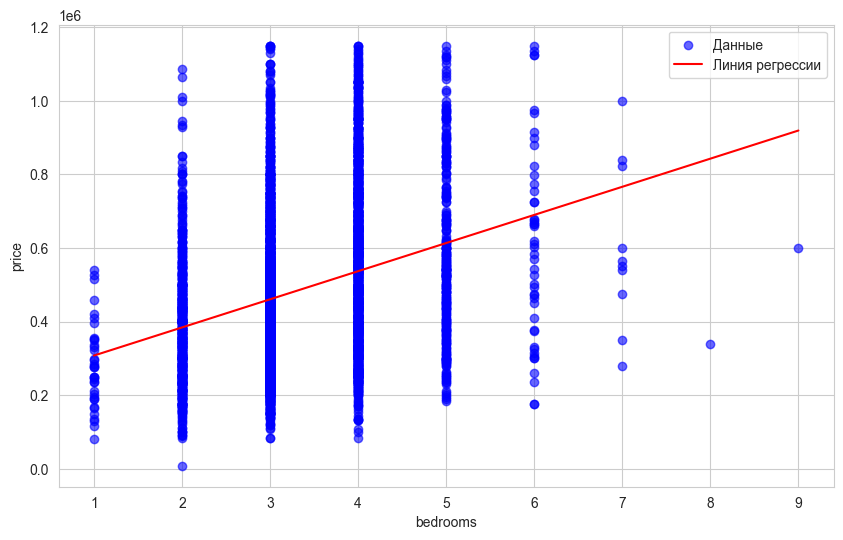

In [230]:
from scipy import stats


def t_test(X, y):
    # Расчет стандартной ошибки коэффициента наклона
    # Формула стандартной ошибки для наклона: SE = sqrt(sum(yi - yi_pred)^2 / (n - 2)) / sqrt(sum(xi - x_mean)^2)
    lin_reg = LinearRegression()
    lin_reg.fit(pd.DataFrame(X), y)
    y_train_pred = lin_reg.predict(pd.DataFrame(X))
    residuals = y - y_train_pred
    sse = np.sum(residuals ** 2)
    n = len(X)
    x_mean = X.mean()
    SE_slope = np.sqrt(sse / (n - 2)) / np.sqrt(np.sum((X - x_mean) ** 2))
    slope = lin_reg.coef_[0]  # Получаем коэффициент наклона (для одной независимой переменной)

    # Расчет t-статистики для коэффициента наклона
    # Формула t-статистики: t = (slope - 0) / SE_slope
    t_statistic = slope / SE_slope

    # Расчет p-значения на основе t-статистики
    p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=n - 2))

    print('Стандартная ошибка коэффициента наклона:', SE_slope)
    print('Значение t-статистики:', t_statistic)
    print('p-уровень значимости:', '{:.10f}'.format(p_value))
    
    
    plt.figure(figsize=(10, 6))

    # Строим scatterplot и линию регрессии
    plt.scatter(X, y, color='blue', label='Данные',alpha=0.6)
    x_label = X.name if X.name else 'X'
    y_label = y.name if y.name else 'y'

    # Рассчитываем значения для линии регрессии
    X_values = np.array([min(X), max(X)])
    y_values = lin_reg.intercept_ + lin_reg.coef_[0] * X_values
    
    # Добавляем линию регрессии к графику
    plt.plot(X_values, y_values, color='red', label='Линия регрессии')
    
    # Добавляем метки и легенду
    plt.xlabel(xlabel=x_label)
    plt.ylabel(ylabel=y_label)
    plt.legend()
    
    # Показываем график
    plt.show()


t_test(df['bedrooms'], df['price'])

Стандартная ошибка коэффициента наклона составляет $3418.17, а значение t-статистики — 20.36. Полученное p-значение приближено к нулю (настолько, что код округляет его до нуля), что, разумеется, значительно меньше стандартного порога статистической значимости 0.05. Это значит, что мы отвергаем нулевую гипотезу, а следовательно, что количество спален имеет статистически значимое влияние на цену, даже если объясняемая вариативность в ценах (R²) остается низкой.

Хотя количество спален и статистически значимо влияет на цену, но оно не является сильным предиктором цены на дома, учитывая низкий коэффициент детерминации. Это может означать, что есть другие факторы, которые также оказывают существенное влияние на цену недвижимости. 

### Влияние количества уборных на цену

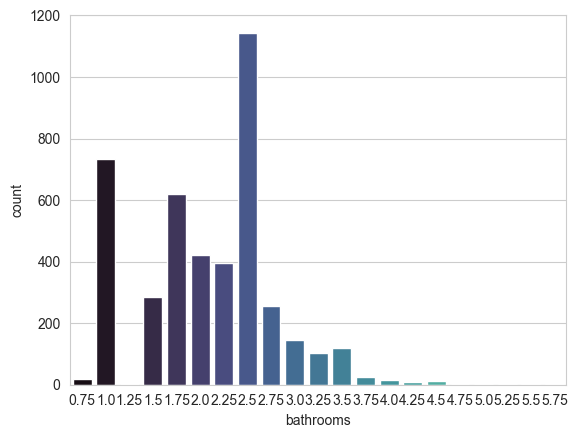

In [177]:
sns.countplot(x=df['bathrooms'], palette='mako')
plt.show()

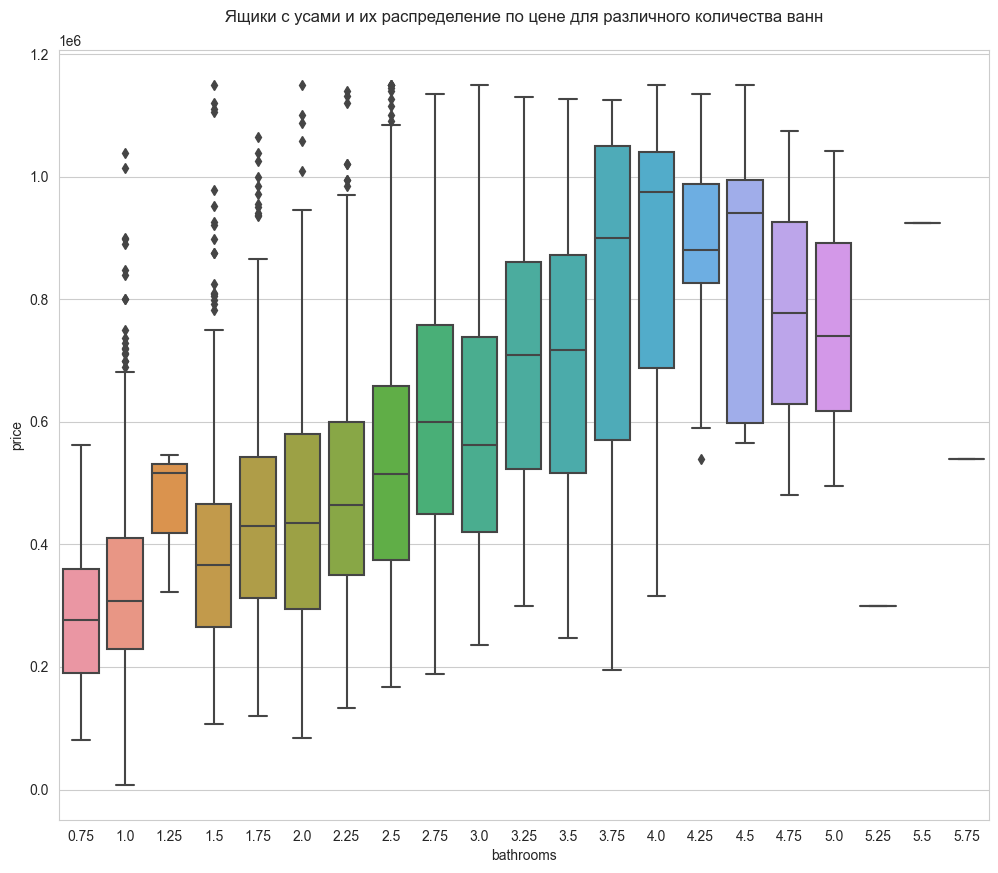

In [178]:
plt.figure(figsize=(12, 10))

sns.boxplot(data=df, x='bathrooms', y='price')
plt.title("Ящики с усами и их распределение по цене для различного количества ванн", pad=20)
plt.show()

Можем видеть, что количество уборных комнат (ну или из-за нецелых значений, возможно, правильнее сказать -- просто некий показатель устройства в туалетной сфере) сильно влияет на цену. Проведём t-test.

Стандартная ошибка коэффициента наклона: 4031.6524012255295
Значение t-статистики: 35.87766793810462
p-уровень значимости: 0.0000000000


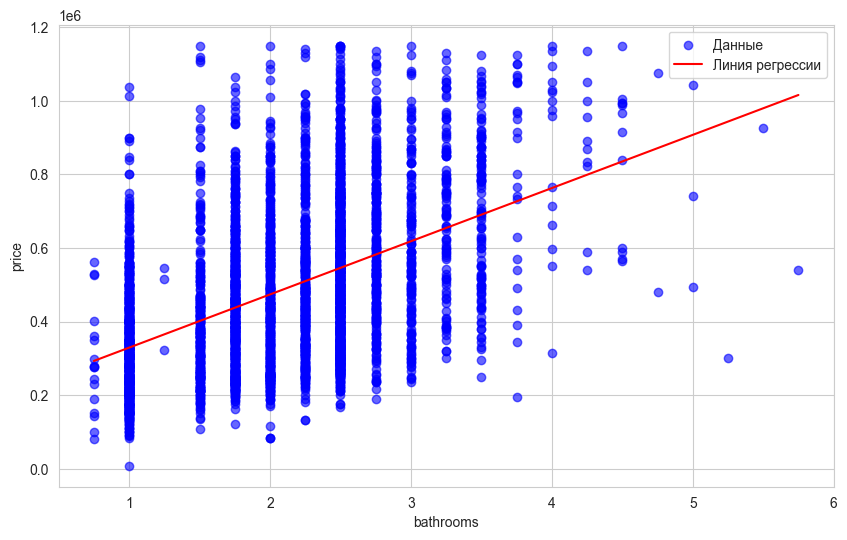

In [179]:
t_test(df['bathrooms'], df['price'])

p-уровень значимости крайне мал. Отвергаем нуелвую гипотезу. Количеств уборных является статистически значимым фактором для цены недвижимости. Включим данный признак в учёт линейной регрессией. Тем самым, возможно, получим более хорошее описание данных через регрессионную линию.

In [180]:
def linear_regression_score(X, y):
    # Разделение данных на тренировочный и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, seed=42)

    # Создание объекта линейной регрессии
    lin_reg = LinearRegression()

    # Обучение модели на тренировочных данных
    lin_reg.fit(X_train, y_train)

    # Предсказание на тестовых данных
    y_pred = lin_reg.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Среднеквадратичная ошибка: {mse}')
    print(f'Средняя абсолютная ошибка: {mae}')
    print(f'Коэффициент детерминации: {r2}')


X = df[['bathrooms', 'bedrooms']]  # будем предсказывать сразу по двум признакам - спальни и ванны
y = df['price']

linear_regression_score(X, y)

Среднеквадратичная ошибка: 35405243233.987114
Средняя абсолютная ошибка: 150474.19324145507
Коэффициент детерминации: 0.24855167132827038


Коэффициент детерминации увеличился, а значит наши данные стали описываться лучше, чем раньше, когда для описания мы использовали только спальни. Ошибки так же уменьшились, но всё равно являются крайне большими.

### Рейтинг состояния

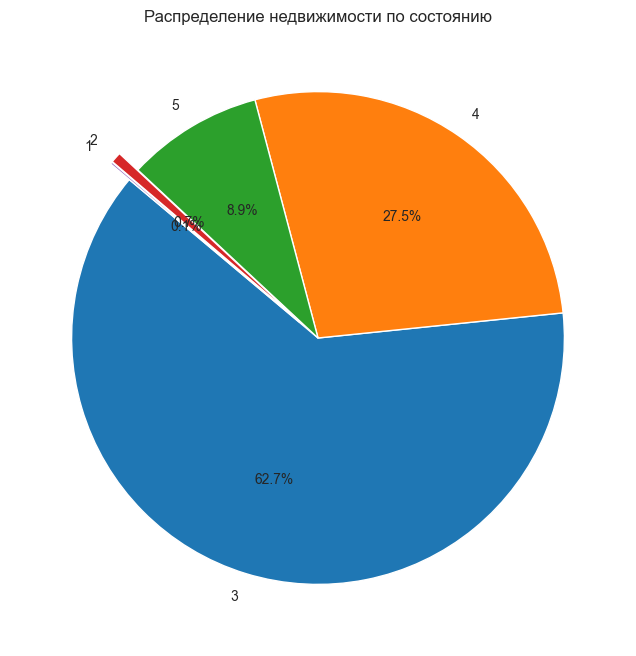

In [181]:
# Подсчёт количества записей для каждого уровня состояния недвижимости
condition_counts = df['condition'].value_counts()

# Создание круговой диаграммы
plt.figure(figsize=(8, 8))
explode = [0.1 if count < 100 else 0.0 for count in condition_counts]  # Выделение маленьких секторов
plt.pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Распределение недвижимости по состоянию')
plt.show()

На круговой диаграмме отображено распределение недвижимости по состоянию. Каждый сектор диаграммы представляет процентное соотношение объектов недвижимости для каждой категории состояния, которое указано в датасете.

Большая часть недвижимости (62.5%) имеет состояние, помеченное как "3", что, вероятно, является средним или стандартным состоянием объекта. Следующая по величине категория — "4", занимающая 27.2% диаграммы, что может указывать на более хорошее состояние. Остальные категории занимают меньший процент и распределены на диаграмме в соответствии с их встречаемостью в датасете.

<AxesSubplot:xlabel='condition', ylabel='price'>

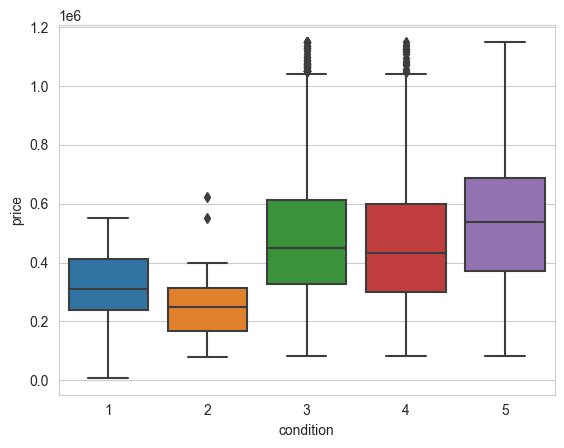

In [182]:
sns.boxplot(data=df, x='condition', y='price')

Визуально более низкую цену имеют дома с состоянием 1 или 2, но тяжёло судить об этом, так как таких примеров слишком мало. 

Стандартная ошибка коэффициента наклона: 4900.00393623889
Значение t-статистики: 3.16446641734789
p-уровень значимости: 0.0015644958


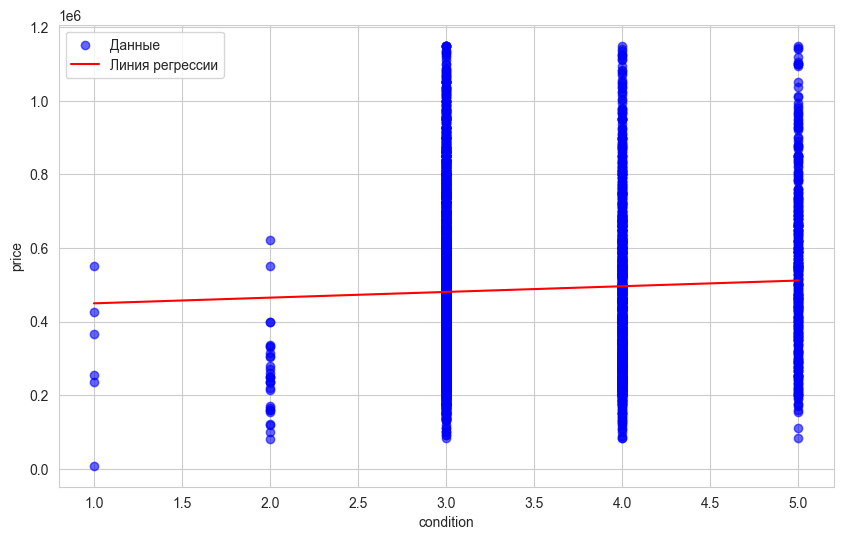

In [183]:
t_test(df['condition'], df['price'])

Исходя из теста - состояние недвижимости тоже является статистически значимым параметром (Хотя график и выглядит так, как будто коэффициент наклона достаточно мал). Включим его при построении регрессии.

In [184]:
X = df[['condition', 'bathrooms', 'bedrooms']]
y = df['price']
linear_regression_score(X, y)

Среднеквадратичная ошибка: 33924610193.414173
Средняя абсолютная ошибка: 148335.05147333138
Коэффициент детерминации: 0.2685287377866429


Видим ощутимые улучшения. Коэффициент детерминации снова вырос, ошибка снова уменьшилась.

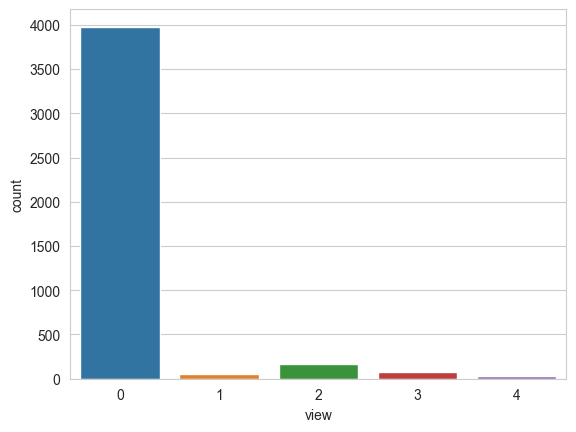

In [185]:
sns.countplot(x=df['view'])
plt.show()

Очень мало у какой недвижимости есть обзорный вид. 

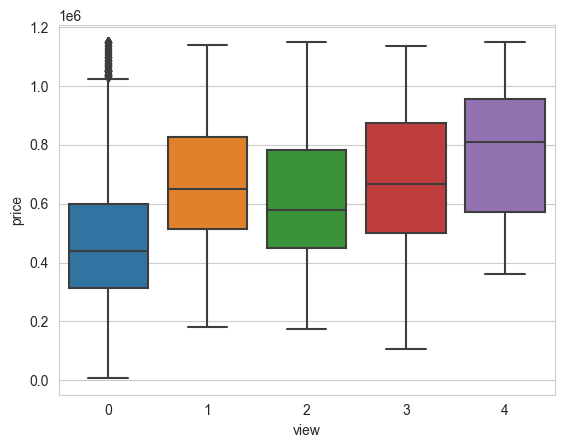

In [186]:
sns.boxplot(data=df, x='view', y='price')
plt.show()

Несмотря на малое количество примеров, можем видеть, что наличие вида сильно влияет на цену в положительную сторону.

Стандартная ошибка коэффициента наклона: 4965.254219911272
Значение t-статистики: 15.071639977508667
p-уровень значимости: 0.0000000000


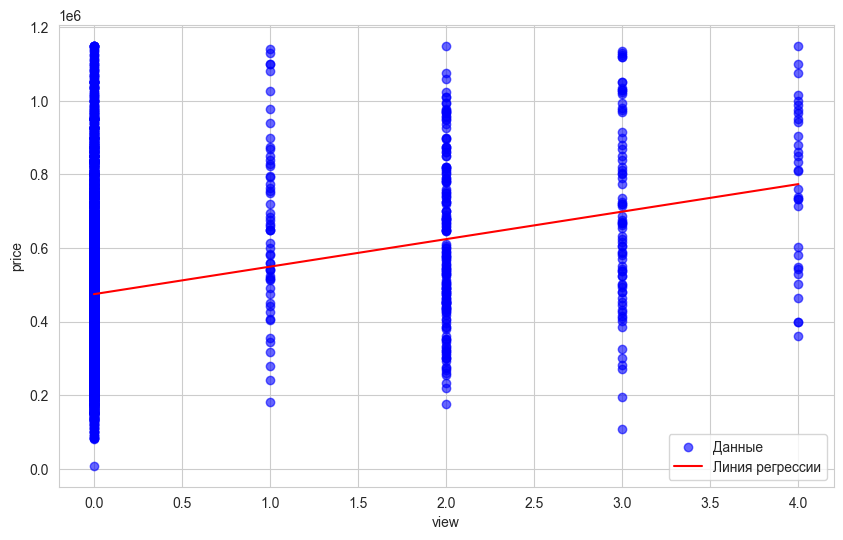

In [187]:
t_test(df['view'], df['price'])

Действительно, наличие вида статистически значимо.

### Жилая площадь
Интуиция подсказывает нам, что чем больше площадь дома, тем больше сам дом стоит. Проверим это

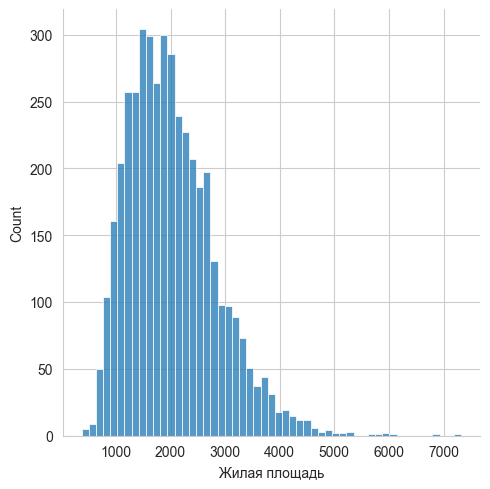

In [188]:
fig = sns.displot(x=df['sqft_living'])
fig.set_xlabels('Жилая площадь')
plt.show()

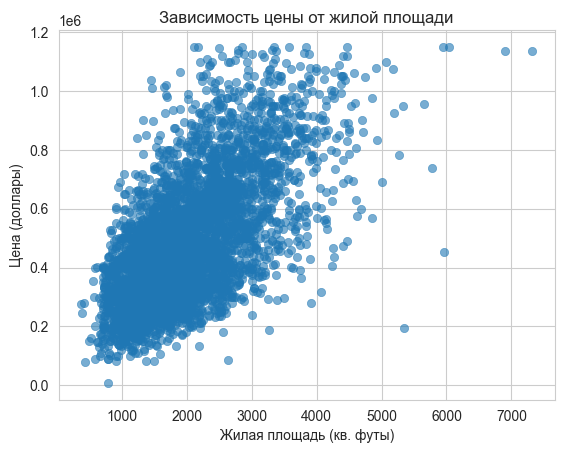

In [189]:

# Стиль фона для лучшей читаемости
sns.set_style('whitegrid')

# Построение точечной диаграммы с использованием Seaborn для лучшего внешнего вида
ax = sns.scatterplot(x='sqft_living', y='price', data=df, alpha=0.6, edgecolor=None)


# Добавляем важные заголовки и метки
plt.title('Зависимость цены от жилой площади')
plt.xlabel('Жилая площадь (кв. футы)')
plt.ylabel('Цена (доллары)')

# Показываем график
plt.show()

Стандартная ошибка коэффициента наклона: 3.1419681891264015
Значение t-статистики: 53.47607861964574
p-уровень значимости: 0.0000000000


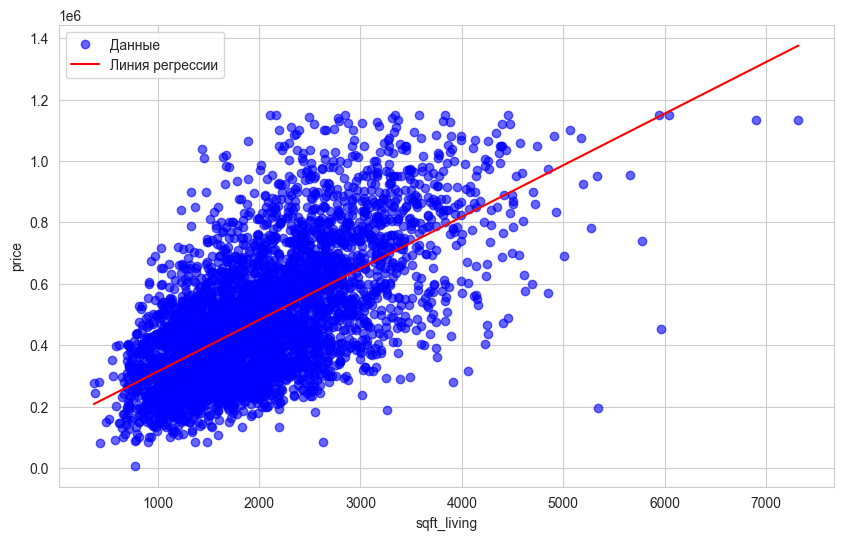

In [190]:
t_test(df['sqft_living'], df['price'])

Можем видеть, что с линейной регрессией достаточно хорошо описывается жилая площадь.

In [191]:
X = df[['condition', 'bathrooms', 'bedrooms', 'view', 'sqft_living']]
y = df['price']
linear_regression_score(X, y)

Среднеквадратичная ошибка: 25802072558.887447
Средняя абсолютная ошибка: 127721.65014431348
Коэффициент детерминации: 0.4303851730320175


Метрики стали ещё лучше! Это говорит о том, что мы движемся в верном направлении.

### Количество этажей


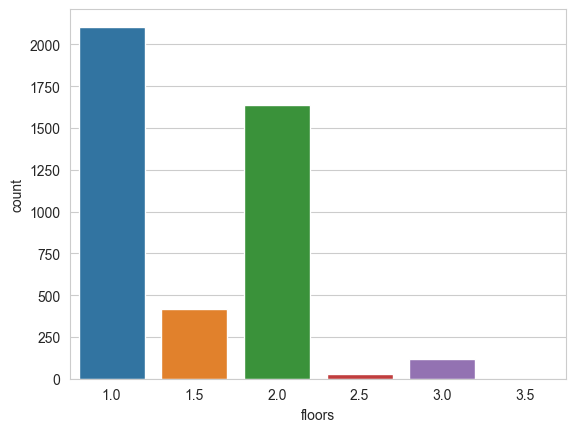

In [192]:
sns.countplot(x=df['floors'])
plt.show()

Можем видеть, что чаще всего встречается недвижимость с одним или двумя этажами.

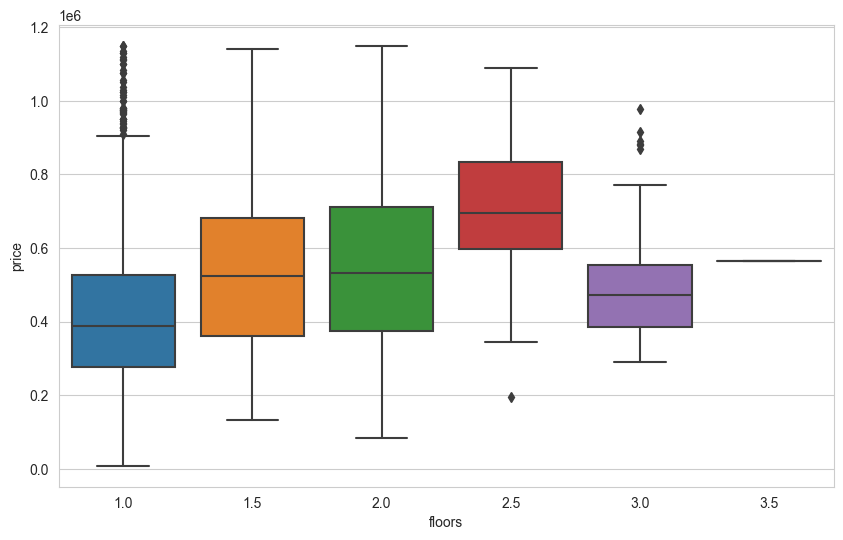

In [193]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='floors', y='price')
plt.show()

Невооружённым глазом видно, что есть различия в ценовом сегменте для разного количества этажей.
Проведём t-тест и построим линейную регрессию:

Стандартная ошибка коэффициента наклона: 5888.225521059621
Значение t-статистики: 18.763565466976885
p-уровень значимости: 0.0000000000


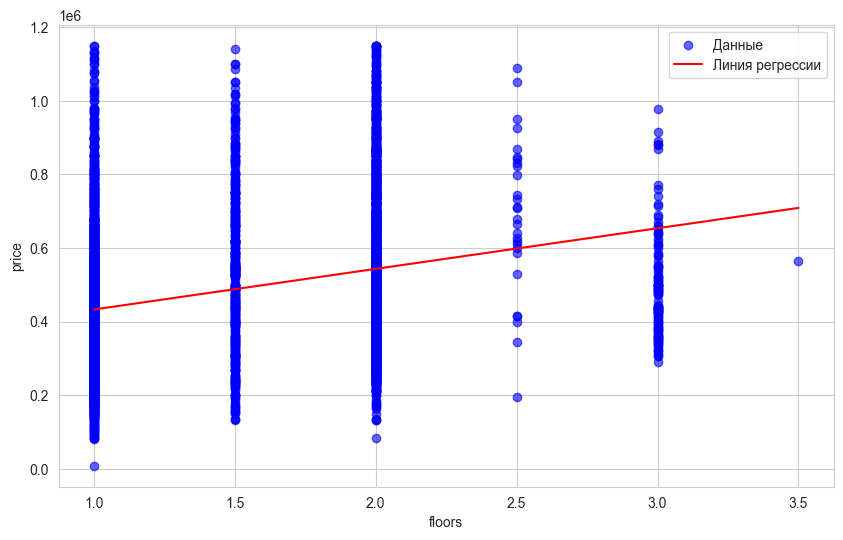

In [194]:
t_test(df['floors'], df['price'])

Этажи являются статистически значимыми! Это видно и из матрицы корреляций, и из ящика с усами (ведь каждая подгруппа имеет своё распределение по цене), и из t-теста, и из того, какой наклон принимает линейная регрессия. Попробуем добавить данный признак в наш "общий учёт":

In [219]:
X = df[['condition', 'bathrooms', 'bedrooms', 'view', 'sqft_living', 'floors']]
linear_regression_score(X, y)

Среднеквадратичная ошибка: 26311061787.694862
Средняя абсолютная ошибка: 130022.61523282767
Коэффициент детерминации: 0.47290972903548556


Метрики выросли, но не сильно. Стоит учитывать, что, судя по ящику с усами, зависимость не совсем линейная. Потому что до 2,5 этажей цены растут, а для трёх этажей происходит резкий спад. Данная проблема решается техникой one-hot encoding, но получение наилучших метрик не является основной целью данной работы. Важен сам факт того, что совокупность признаков лучше описывает цену, чем описание цены лишь одним признаком.

### Совокупность площадей вне подвала и площадь подвала
Вспомним, как выглядят данные:

In [196]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,2014-05-02 00:00:00,342000.0,3,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4,2.5,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2,1.0,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA


In [197]:
hypothesis_mask = (df['sqft_living'] == (df['sqft_above']+df['sqft_basement']))
print('Количество домов, где вся жилая площадь = площадь подвала + площадь вне подвала: ', len(df[hypothesis_mask]))
print('Количество домов во всей выборке:', len(df))

Количество домов, где вся жилая площадь = площадь подвала + площадь вне подвала:  4310
Количество домов во всей выборке: 4310


Как можно видеть, sqft_living буквально всегда получается из суммы двух других колонок. А значит признак sqft_living сам по себе является не таким полезным, как отдельные площади в том же пространстве. Так что посмотрим на то, как влияют sqft_basement и sqft_above по отдельности.

Стандартная ошибка коэффициента наклона: 7.561213622458155
Значение t-статистики: 15.515321961417538
p-уровень значимости: 0.0000000000


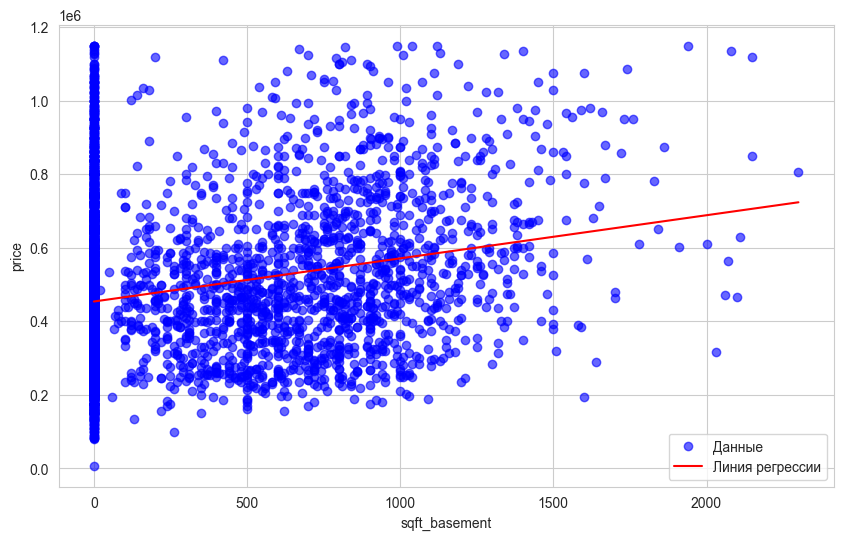

In [200]:
t_test(df['sqft_basement'], df['price'])

По графику стало понятно, что есть много объектов, где подвала просто нет. Давайте создадим отдельную колонку, которая бы учитывала отсутствие как отдельную категорию.

In [205]:
df['is_basement'] = np.where(df['sqft_basement'] > 0, 1, 0)

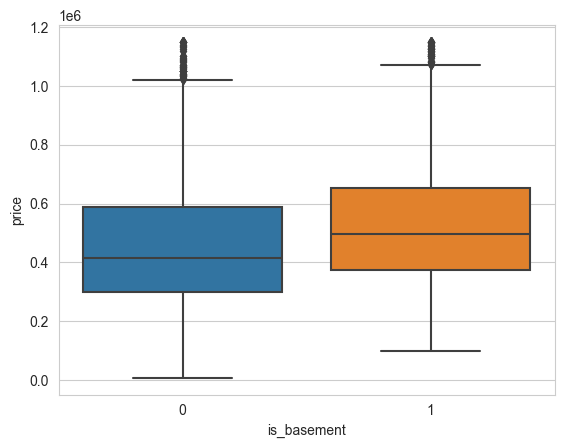

In [207]:
sns.boxplot(data=df, x='is_basement', y='price')
plt.show()

Сразу видно разницу в распределениях. Там, где есть подвал - цена выше.

Стандартная ошибка коэффициента наклона: 3.6116398689303706
Значение t-статистики: 42.43665204395516
p-уровень значимости: 0.0000000000


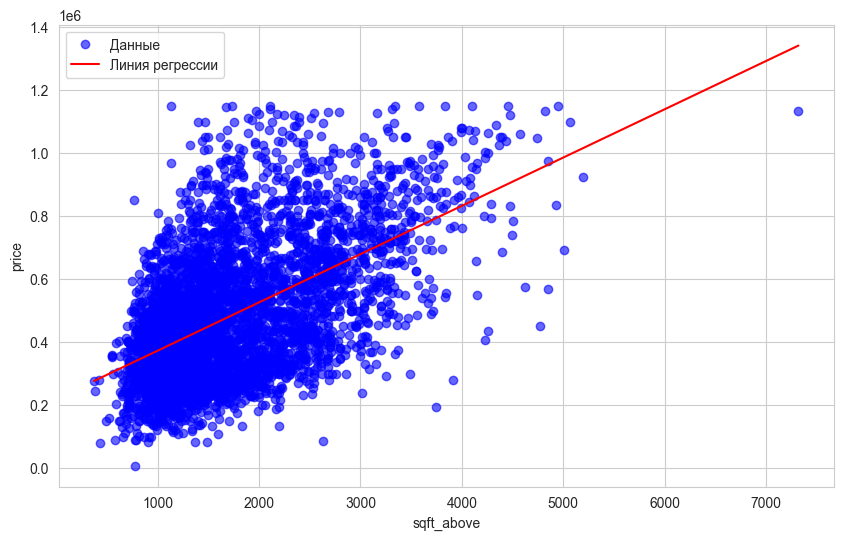

In [209]:
t_test(df['sqft_above'], df['price'])


Линия относительно хорошо описывает общий ценовой тренд. Включим новые 3 признака (2 изначальных и 1 созданный нами) в обучение модели.

In [221]:
X = df[['condition', 'bathrooms', 'bedrooms', 'view', 'floors', 'sqft_above', 'sqft_basement', 'is_basement']]
linear_regression_score(X, y)

Среднеквадратичная ошибка: 25488692579.533497
Средняя абсолютная ошибка: 127774.19927065459
Коэффициент детерминации: 0.4427957947643928


Ошибка уменьшилась, а вот коэффициент детерминации стал хуже, чем был. Но это не так важно, так как это не является целью нашего исследования.

## Вывод

Мы проанализировали исходные данные, изучили распределение и особенности данных. Смогли визуализировать, как у разных подгрупп по определённому категориальному (имеется в виду числовой признак с малым количеством уникальных значений)признаку отличается цена. Для этого мы использовали ящик с усами на таких признаках, как количество этажей, рейтинг состояния недвижимости и так далее. Узнали, что больше - не всегда лучше, то есть, например, для недвижимости с 7-ью спальнями цена в среднем несколько ниже, чем для недвижимости с 6-ью. Другими словами, зависимость от количества спален присутствует, но она не является строго линейной. Смогли визуализировать, как меняется цена с ростом каких-либо числовых признаков (например, жилая площадь). 

Также мы многократно построили линейную регрессию для демонстрации возможности описания зависимости целевой переменной (цены на недвижимость) от какого-либо отдельного фактора. Также мы построили множественную линейную регрессию для демонстрации возможности улучшить качество прогнозирования, если учитывать множество факторов как линейную комбинацию.

Ко всему прочему мы проверили множество гипотез на то, является ли тот или иной фактор статистически значим. 
В частности, изначально мы делали это для одного фактора - количество спален в недвижимости. В ходе расчётов мы отвергли нулевую (H0) гипотезу и приняли альтернативную (H1) гипотезу, тем самым признав, что данный признак является статистическим-значимым.